In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv("../data/processed/train_FD001_processed.csv")
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [2]:
sensor_cols = [f"sensor_{i}" for i in range(1,22)]
df[sensor_cols].head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
sensor_var = df[sensor_cols].var().sort_values(ascending=False)
sensor_var = sensor_var.reset_index()
sensor_var.columns = ["sensor","variance"]
sensor_var


,sensor,variance
0,sensor_9,4.876536e+02
1,sensor_14,3.639005e+02
2,sensor_4,8.101089e+01
3,sensor_3,3.759099e+01
4,sensor_17,2.398667e+00
5,sensor_7,7.833883e-01
6,sensor_12,5.439850e-01
7,sensor_2,2.500533e-01
8,sensor_11,7.133568e-02
9,sensor_20,3.266927e-02


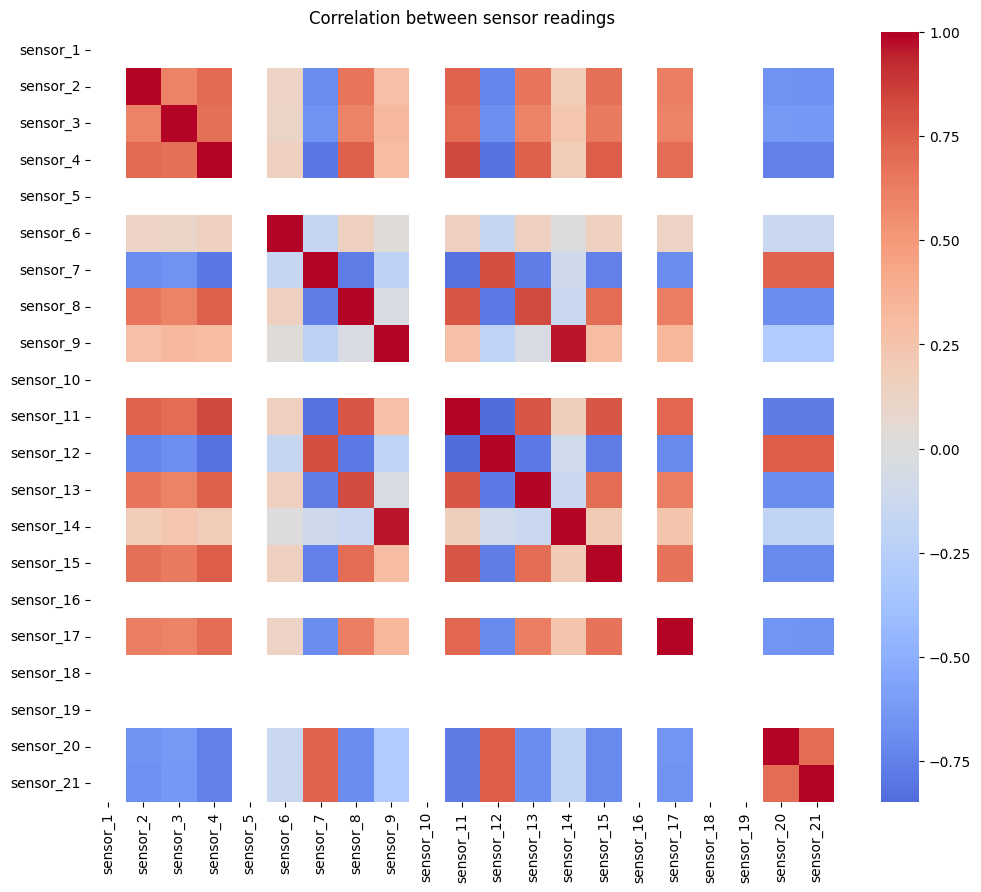

In [4]:
plt.figure(figsize=(12,10))
corr = df[sensor_cols].corr()
sns.heatmap(corr,cmap = "coolwarm",center = 0)
plt.title("Correlation between sensor readings")
plt.show()

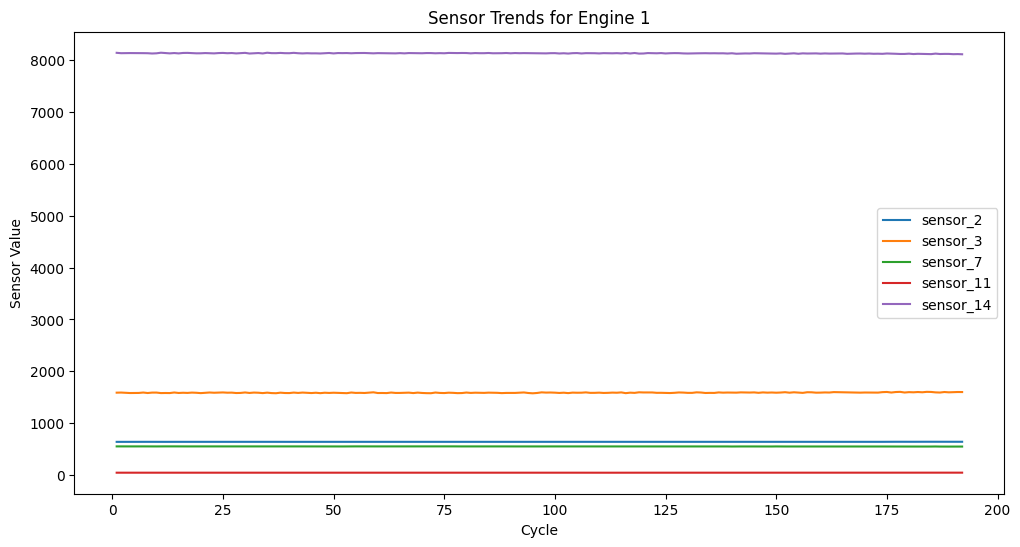

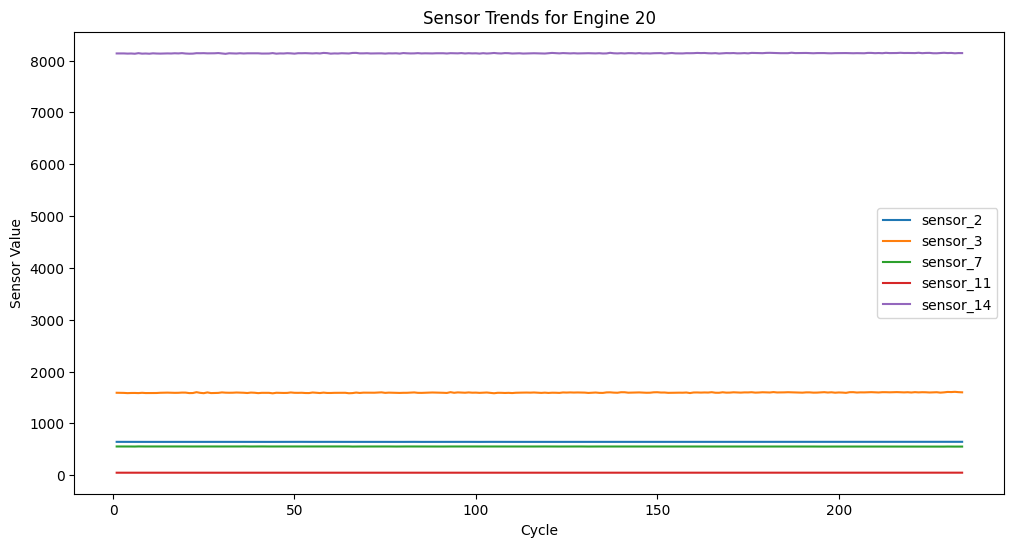

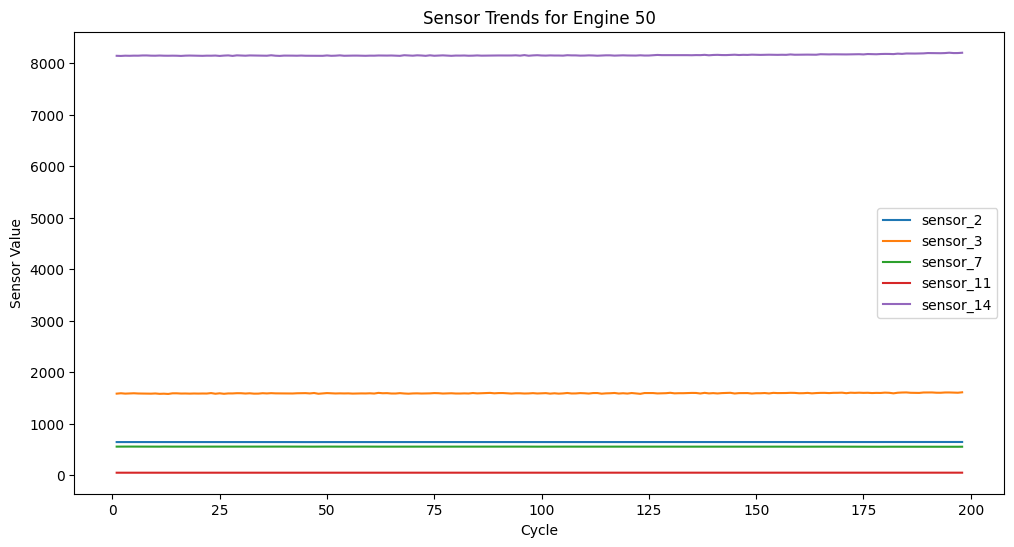

In [6]:
#sensor readings across the life of an engine
engines_to_plot=[1,20,50]
sensors_to_plot = ["sensor_2", "sensor_3", "sensor_7", "sensor_11", "sensor_14"]

for eng in engines_to_plot:
    subset = df[df["unit_number"]==eng]
    plt.figure(figsize=(12,6))

    for s in sensors_to_plot:
        plt.plot(subset["time_in_cycles"], subset[s], label=s)
    
    plt.title(f"Sensor Trends for Engine {eng}")
    plt.xlabel("Cycle")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.show()

In [7]:
df_rul = df.copy()
df_rul["RUL"] = df_rul.groupby("unit_number")["time_in_cycles"].transform(lambda x: x.max()-x)
df_rul.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sensor_cols = [f"sensor_{i}" for i in range(1,22)]
df_norm = df_rul.copy()

for eng, subset in df_rul.groupby("unit_number"):
    df_norm.loc[subset.index,sensor_cols] = scaler.fit_transform(subset[sensor_cols])

/var/folders/mx/vz440tc13r30000gjn16f5qw0000gn/T/ipykernel_42471/1101803768.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.25  0.25  0.    0.25  0.375 0.125 0.25  0.125 0.25  0.375 0.25  0.125
 0.375 0.375 0.125 0.25  0.25  0.25  0.125 0.25  0.25  0.25  0.25  0.25
 0.375 0.5   0.375 0.    0.375 0.    0.25  0.25  0.25  0.25  0.125 0.25
 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.25  0.25
 0.25  0.25  0.375 0.125 0.25  0.25  0.25  0.125 0.25  0.    0.25  0.375
 0.125 0.125 0.5   0.125 0.25  0.125 0.375 0.25  0.25  0.25  0.125 0.125
 0.125 0.25  0.25  0.    0.375 0.25  0.5   0.25  0.25  0.375 0.125 0.25
 0.25  0.5   0.125 0.25  0.25  0.125 0.5   0.25  0.25  0.375 0.5   0.25
 0.25  0.125 0.375 0.25  0.125 0.375 0.25  0.25  0.375 0.25  0.75  0.375
 0.5   0.375 0.25  0.5   0.375 0.5   0.375 0.5   0.125 0.375 0.5   0.375
 0.5   0.375 0.25  0.375 0.5   0.25  0.375 0.375 0.375 0.5   0.1

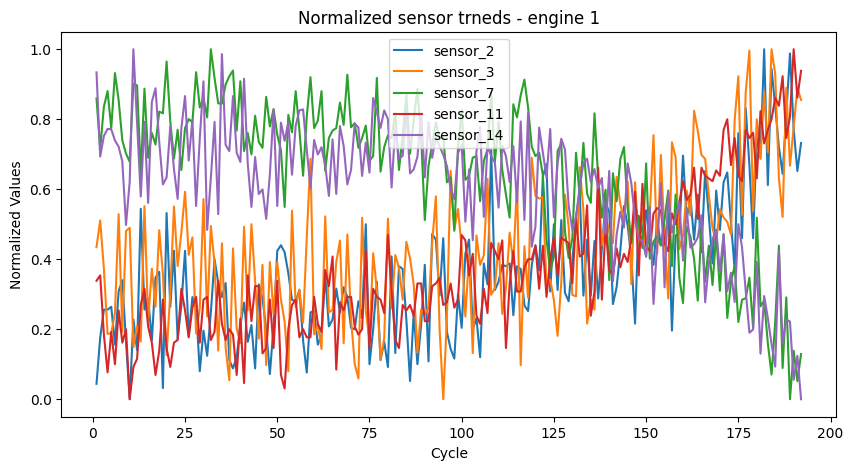

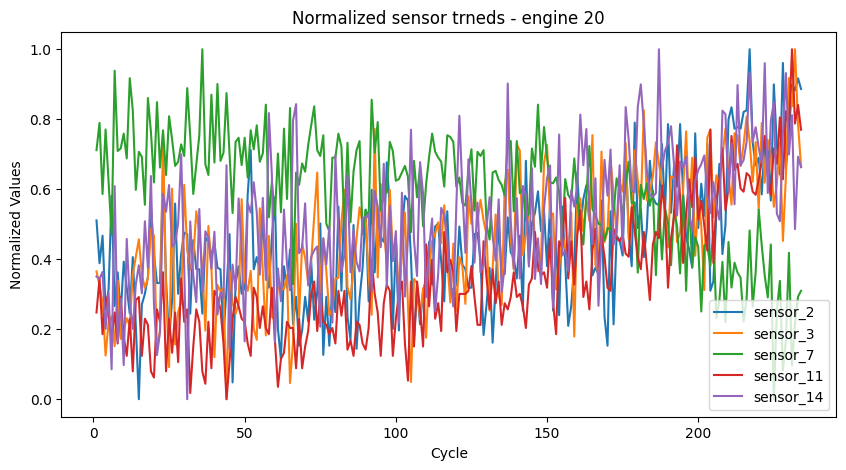

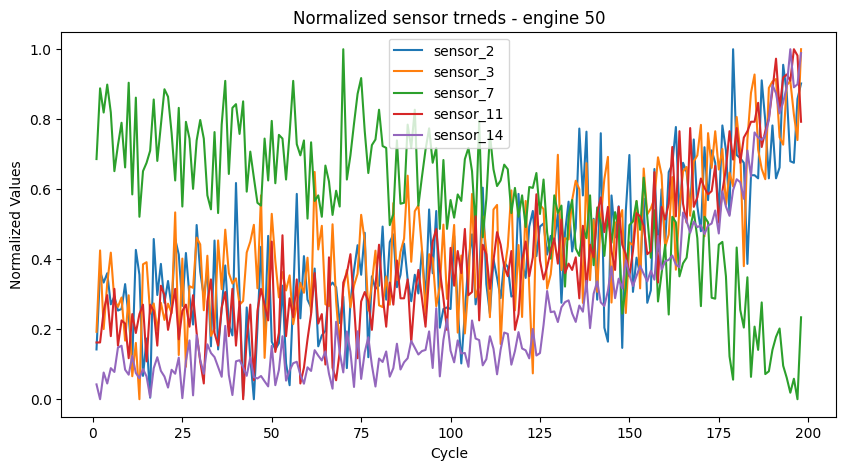

In [12]:
for eng in [1,20,50]:
    subset = df_norm[df_norm["unit_number"] == eng]
    plt.figure(figsize=(10,5))
    for s in ["sensor_2","sensor_3","sensor_7","sensor_11","sensor_14"]:
        plt.plot(subset["time_in_cycles"],subset[s],label = s)
    plt.title(f"Normalized sensor trneds - engine {eng}")
    plt.xlabel("Cycle")
    plt.ylabel("Normalized Values")
    plt.legend()
    plt.show

In [14]:
#RUL per engine
# Compute RUL per engine
df_rul = df_norm.copy()
rul_per_engine = df_rul.groupby('unit_number')['time_in_cycles'].max()

df_rul['RUL'] = df_rul.apply(
    lambda row: rul_per_engine[row['unit_number']] - row['time_in_cycles'],
    axis=1
)
df_rul.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,0.0,0.044,0.434626,0.180277,0.0,...,0.131579,0.933895,0.332039,0.0,0.250,0,0.0,0.857143,0.850490,191.0
1,1,2,0.0019,-0.0003,100.0,0.0,0.176,0.510776,0.245506,0.0,...,0.263158,0.693423,0.411650,0.0,0.250,0,0.0,0.785714,0.858991,190.0
2,1,3,-0.0043,0.0003,100.0,0.0,0.256,0.373204,0.272727,0.0,...,0.157895,0.752108,0.321036,0.0,0.000,0,0.0,0.726190,0.712253,189.0
3,1,4,0.0007,0.0000,100.0,0.0,0.256,0.186422,0.212892,0.0,...,0.289474,0.772344,0.000000,0.0,0.250,0,0.0,0.642857,0.767141,188.0
4,1,5,-0.0019,-0.0002,100.0,0.0,0.264,0.188578,0.324602,0.0,...,0.184211,0.771332,0.396117,0.0,0.375,0,0.0,0.666667,0.823508,187.0


In [15]:
selected_sensors = ['sensor_2', 'sensor_3', 'sensor_7', 'sensor_11', 'sensor_14']


In [17]:
#rolling features
window = 5
for s in selected_sensors:
    df_rul[f"{s}_mean_{window}"] = (df_rul.groupby('unit_number')[s].rolling(window,min_periods=1).mean().reset_index(0,drop = True))
    df_rul[f"{s}_std_{window}"] = (df_rul.groupby('unit_number')[s].rolling(window,min_periods=1).std().reset_index(0,drop = True))


In [18]:
#prepare train and test sets
from sklearn.model_selection import train_test_split
feature_cols = [col for col in df_rul.columns if col.startswith('sensor')]
X = df_rul[feature_cols]
y = df_rul['RUL']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
df_rul.to_csv("../data/processed/train_FD001_RUL.csv",index = False)